In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype('float64')
y = mnist.target.astype('int')

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
y_binary = (y == 1).astype(int)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=10000, random_state=42)

# Standardizing Data

In [5]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# PCA

In [30]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Eigenvalues and Cumulative explained variance ratio

In [31]:
eigenvalues = pca.explained_variance_

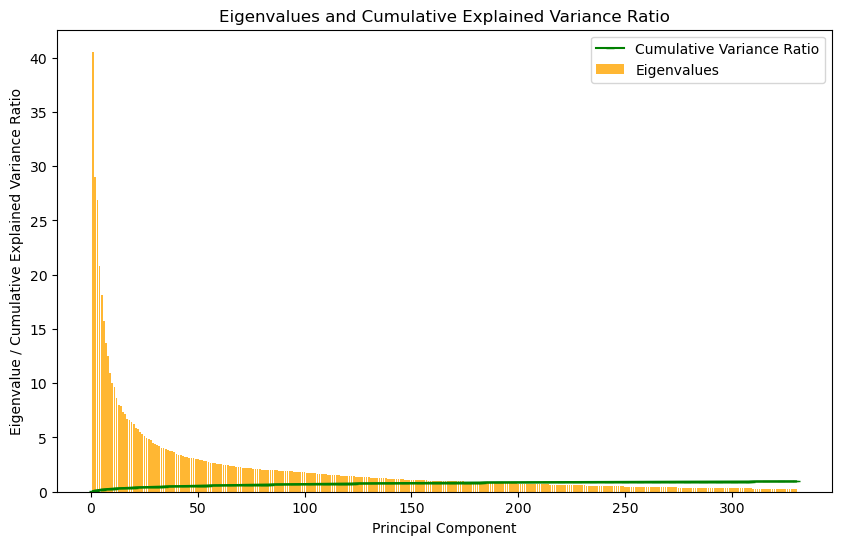

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.8, color='Orange', align='center', label='Eigenvalues')
plt.plot(range(1, len(eigenvalues) + 1), cumulative_var_ratio, color='green', marker='_', label='Cumulative Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue / Cumulative Explained Variance Ratio')
plt.title('Eigenvalues and Cumulative Explained Variance Ratio')
plt.legend()
plt.show()

# Training a classifier

In [19]:
from sklearn.pipeline import make_pipeline
classifier = make_pipeline(StandardScaler(), LogisticRegression())
classifier.fit(X_train_pca, y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [20]:
y_pred = classifier.predict(X_test_pca)

# Confusion Matrix

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[8800   48]
 [  33 1119]]


# Precision/Recall

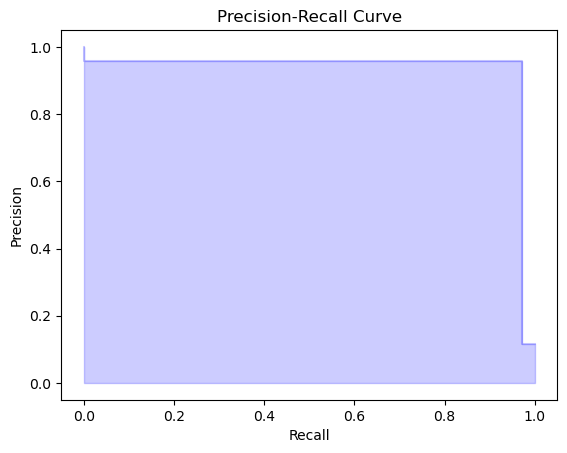

In [22]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

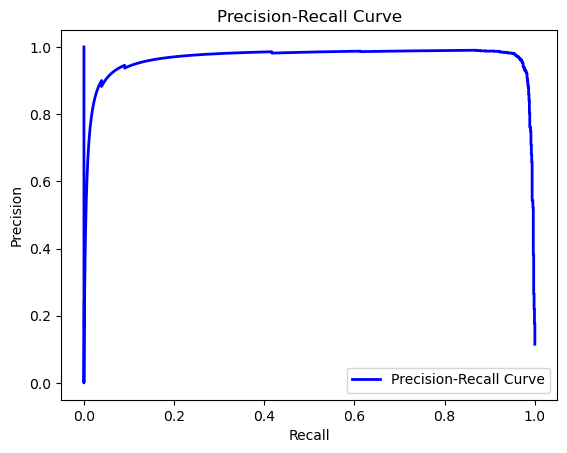

In [34]:
y_prob = classifier.predict_proba(X_test_pca)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure()
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

# ROC Curve

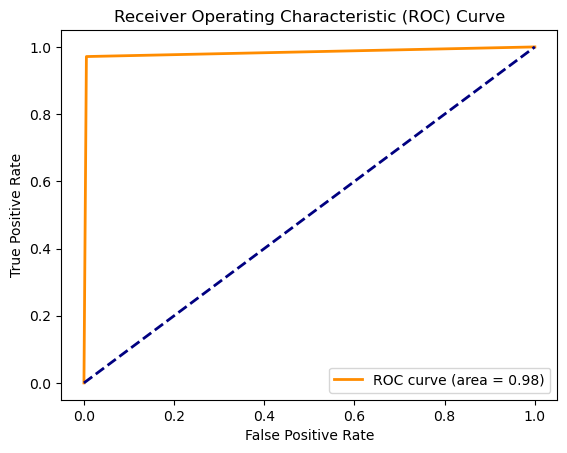

In [29]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()